# Micrograd
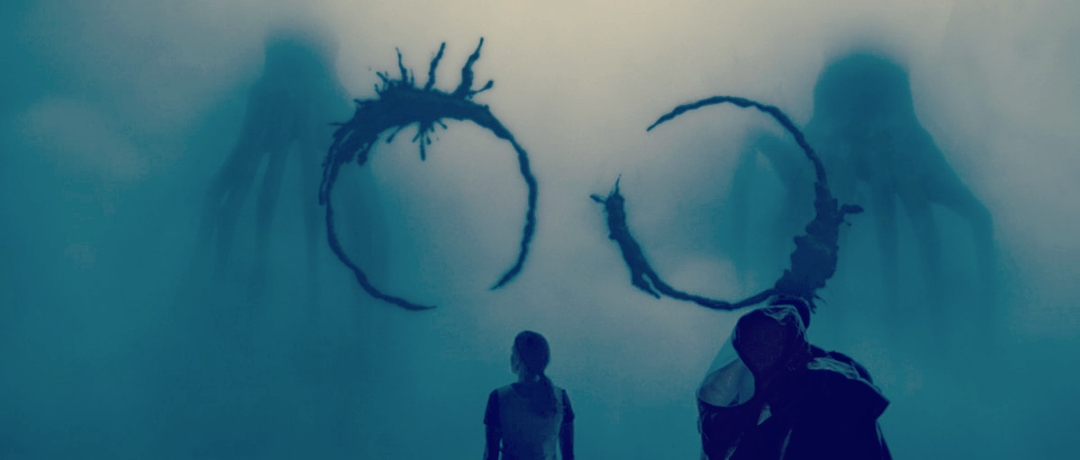

Backpropagation is the engine on which neural networks are run. Micrograd provides an automatic gradient library for performing atomic level backpropagation on neural network inputs.

In [53]:
#import neccessary libraries
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
def f(x):
    return 3*x**2 - 4*x + 5

In [55]:
f(3.0)

20.0

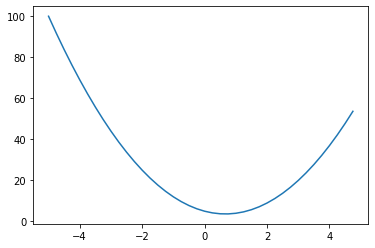

In [56]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [100]:
class Value:
    def __init__(self, data, _children = (), _op="", label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.grad = 0.0
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [114]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a * b; e.label ='e'    
d = e + c; d.label = 'd'
f = Value(-2.0, label ='f')
L = d * f; label='L'
L.data

-8.0

In [102]:
from graphviz import Digraph

def trace(root):
    """
    Traces the object graph starting from a root object and returns the set of nodes and edges.

    Args:
        root: The root object from which to start tracing the object graph.

    Returns:
        A tuple containing the set of nodes and edges in the object graph.
    """
    # Initialize sets to store nodes and edges
    nodes, edges = set(), set()

    # Recursive function to build the object graph
    def build(v):
        """
        Recursive function to build the object graph.

        Args:
            v: The current object in the graph traversal.
        """
        if v not in nodes:
            nodes.add(v)  # Add current node to the set of nodes

            # Traverse child nodes and create edges
            for child in v._prev:
                edges.add((child, v))  # Add edge (child, v)
                build(child)  # Recursively build child nodes

    build(root)  # Start building the graph from the root node

    # Return the resulting nodes and edges
    return nodes, edges

In [104]:
def draw_dot(root):
    """
    Draws a directed graph using Graphviz based on the object relationships starting from a root object.

    Args:
        root: The root object from which to start tracing the object relationships.

    Returns:
        A Graphviz Digraph object representing the object relationships.
    """
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    # Trace object relationships
    nodes, edges = trace(root)

    # Add nodes to the graph
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{ %s| data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')

        if n._op:
            # Add operation node and edge
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)

    # Add edges to the graph
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


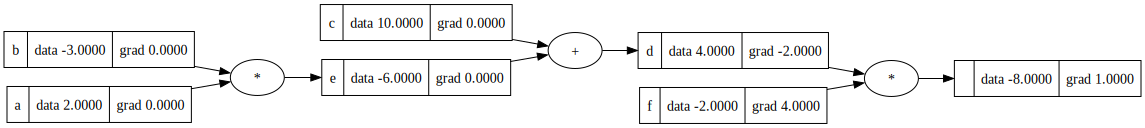

In [121]:
draw_dot(L)

In [120]:
L.grad = 1.0
f.grad = 4.0
d.grad = -2.0

In [131]:
def lol():
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a * b; e.label ='e'    
    d = e + c; d.label = 'd'
    f = Value(-2.0, label ='f')
    L = d * f; label='L'
    L1 = L.data

    h = 0.001
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a * b; e.label ='e'    
    d = e + c; d.label = 'd'
    e.data +=h
    f = Value(-2.0, label ='f')
    L2 = d * f; label='L'
    L2 = L2.data
    print((L2 - L1)/h)
    
lol()

0.0
